In [51]:
import pandas as pd
mdb = pd.read_csv("c:\\Users\\santi\\Downloads\\mongo_temp_hist.txt")
sql = pd.read_csv("c:\\Users\\santi\\Downloads\\Mysql_temp_hist.txt")
mdb['Database'] = "MongoDB"
sql['Database'] = "MySQL"
merged_df = pd.concat([sql, mdb])
merged_df.reset_index(inplace=True)
merged_df

,index,metric,submetric,score,Database
0,0,[OVERALL],RunTime(ms),9.966800e+04,MySQL
1,1,[OVERALL],Throughput(ops/sec),1.003331e+02,MySQL
2,2,[TOTAL_GCS_Copy],Count,1.100000e+01,MySQL
3,3,[TOTAL_GC_TIME_Copy],Time(ms),4.800000e+01,MySQL
4,4,[TOTAL_GC_TIME_%_Copy],Time(%),4.815989e-02,MySQL
5,5,[TOTAL_GCS_MarkSweepCompact],Count,0.000000e+00,MySQL
6,6,[TOTAL_GC_TIME_MarkSweepCompact],Time(ms),0.000000e+00,MySQL
7,7,[TOTAL_GC_TIME_%_MarkSweepCompact],Time(%),0.000000e+00,MySQL
8,8,[TOTAL_GCs],Count,1.100000e+01,MySQL
9,9,[TOTAL_GC_TIME],Time(ms),4.800000e+01,MySQL


In [53]:
plot = merged_df.iloc[[0,1,12,15,19,22,
                26,27,38,41,45,48]]
plot

,index,metric,submetric,score,Database
0,0,[OVERALL],RunTime(ms),99668.000000,MySQL
1,1,[OVERALL],Throughput(ops/sec),100.333106,MySQL
12,12,[CLEANUP],AverageLatency(us),1506.000000,MySQL
15,15,[CLEANUP],MaxLatency(us),1506.000000,MySQL
19,19,[INSERT],AverageLatency(us),9877.662300,MySQL
22,22,[INSERT],MaxLatency(us),99164.000000,MySQL
26,0,[OVERALL],RunTime(ms),2641.000000,MongoDB
27,1,[OVERALL],Throughput(ops/sec),3786.444529,MongoDB
38,12,[CLEANUP],AverageLatency(us),1654.000000,MongoDB
41,15,[CLEANUP],MaxLatency(us),1654.000000,MongoDB


C:\Users\santi\AppData\Local\Temp\ipykernel_9336\1146548614.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['metric'] ='Insert'
C:\Users\santi\AppData\Local\Temp\ipykernel_9336\1146548614.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['metric'] ='Overall'
C:\Users\santi\AppData\Local\Temp\ipykernel_9336\1146548614.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

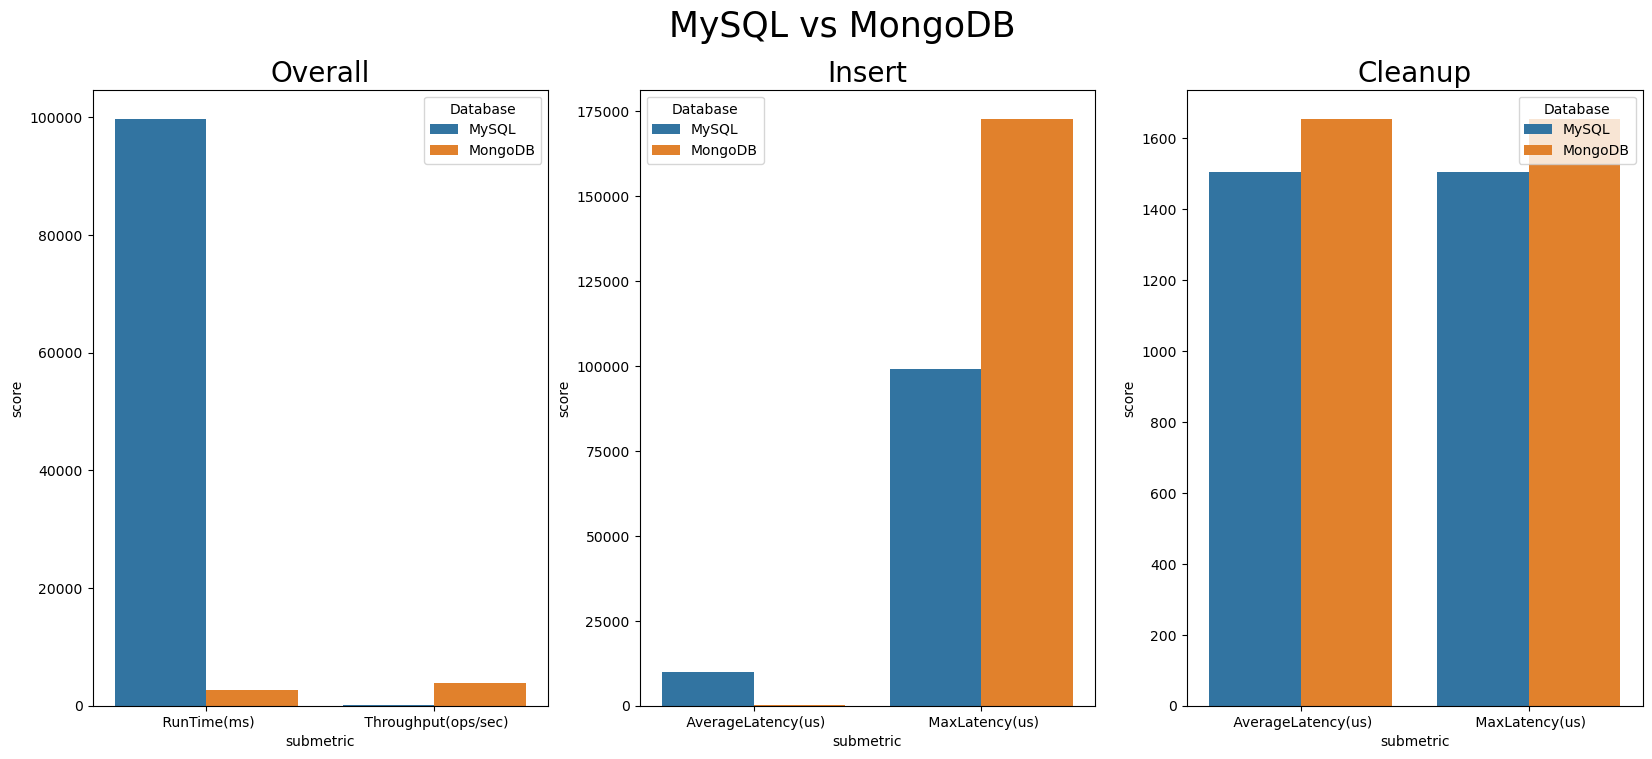

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))

# overall
a = plot[plot['metric']=="[OVERALL]"]
a['metric'] ='Insert'
sns.barplot(x=a['submetric'],y=a['score'],hue=a['Database'], ax=ax1)
ax1.set_title('Overall',fontsize=20)

# Insert
a = plot[plot['metric']=="[INSERT]"]
a['metric'] ='Overall'
sns.barplot(x=a['submetric'],y=a['score'],hue=a['Database'], ax=ax2)
ax2.set_title('Insert',fontsize=20)

#cleanup
a = plot[plot['metric']=="[CLEANUP]"]
a['metric'] ='Cleanup'
sns.barplot(x=a['submetric'],y=a['score'],hue=a['Database'], ax=ax3)
ax3.set_title('Cleanup',fontsize=20)

# Add an overall title for the figure
fig.suptitle('MySQL vs MongoDB',fontsize=25)

plt.show()
